In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline

df = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

FileNotFoundError: [Errno 2] File datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv does not exist: 'datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
#df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [2]:
df.shape

NameError: name 'df' is not defined

In [3]:
df.head()

NameError: name 'df' is not defined

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges is of 'Object' datatype. Looking at the data set it should be of 'float' data type

Convert 'TotalCharges' to numeric data type

In [7]:
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

ValueError: Unable to parse string " " at position 488. 

In [8]:
df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

The error is because of whitespace in the 'TotalCharges' column. If there is a missing observation pandas would have filled with NaN but since there is a whitespace character the entire feature is converted to string data type.

Replace the whitespace with 'NaN'

In [9]:
df = df.replace('^\s*$',np.nan, regex = True)

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we are able to see 11 observations as NaN

In [11]:
df.shape

(7043, 21)

In [12]:
df.dropna(axis = 0 ,inplace = True)
df.shape #11 missing observations are removed

(7032, 21)

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the data now.

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [15]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

This shows that there is slight imbalance in the dataset but it is not very big. So moving forward with this.

Since most of the observations are categorical with only two categories 'Yes', 'No'. we use a mapping function to convert them to discrete rather than using df['Colname'].replace() everytime.

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
col = ['Partner','Dependents','PhoneService','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

Using .value_counts() we can find the number of categories inside a categorical variable.

col_2 indicate variables with two categories and col_3 indicate variables with 3 categories

In [18]:
col_2 = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

In [19]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [20]:
col_3 = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [21]:
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

for all the variables in col_3 the three categories remain same 'Yes','No','No internet service'

In [22]:
df['gender'].replace(('Male','Female'),(1,0),inplace = True)

In [23]:
df_2 = df[col_2]

In [24]:
df_2.head()

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Yes,No,No,Yes,No
1,No,No,Yes,No,No
2,No,No,Yes,Yes,Yes
3,No,No,No,No,No
4,No,No,Yes,Yes,Yes


In [25]:
for i,j in enumerate(df_2.columns):
    df[j] = df[j].replace(('Yes','No'),(1,0))

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [27]:
df_3 = df[col_3]

In [28]:
for i,j in enumerate(df_3.columns):
    df[j] = df[j].replace(('No internet service','No','Yes'),(0,1,2))

In [29]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [30]:
df['MultipleLines'].replace(('No phone service','No','Yes'),(0,1,2),inplace = True)

In [31]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Fiber optic networks can deliver speeds up to 1 Gpbs (1000 Mbps), whereas DSL speeds typically top out around 6 Mbps. Some domain understanding will help in encoding.

In [32]:
df['InternetService'].replace(('No','DSL','Fiber optic'),(0,1,2),inplace = True)

In [33]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [34]:
df['Contract'].replace(('Month-to-month','One year','Two year'),(1,2,3),inplace = True)

In [35]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

We need to do One Hot Encoding for the 'PaymentMethod' for which we will use pd.get_dummies. 'CustomerID' is not useful in predicting the target so we can remove it from the list of independent variables.

In [36]:
del df['customerID']

In [37]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,1,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,2,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,1,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,2,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,1,1,Electronic check,70.70,151.65,1


In [39]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [40]:
df_final = pd.get_dummies(df)

In [41]:
df_final.shape

(7032, 23)

In [42]:
df_final.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [43]:
y = df_final['Churn']
X = df_final.drop('Churn', axis = 1)

import libraries for machine learning

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,f1_score,confusion_matrix

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, shuffle = True)

In [46]:
print(X_train.shape)
print(y_train.shape)

(5625, 22)
(5625,)


logistic regression

In [47]:
lr = LogisticRegression().fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [48]:
lr_precision = precision_score(y_test,lr_pred)
lr_recall = recall_score(y_test,lr_pred)
lr_f1 = f1_score(y_test,lr_pred)

In [49]:
print('LR Precision',lr_precision)
print('LR recall', lr_recall)
print('LR F1 score',lr_f1)

LR Precision 0.6645569620253164
LR recall 0.5555555555555556
LR F1 score 0.6051873198847262


RandomForestClassifier

In [50]:
rf = RandomForestClassifier(random_state =42).fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [51]:
rf_precision = precision_score(y_test,rf_pred)
rf_recall = recall_score(y_test,rf_pred)
rf_f1 = f1_score(y_test,rf_pred)

In [52]:
print('RF Precision',rf_precision)
print('RF recall', rf_recall)
print('RF F1 score',rf_f1)

RF Precision 0.6294964028776978
RF recall 0.46296296296296297
RF F1 score 0.5335365853658537


GridSearchCV to find the best hyperparameters of the model

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
rf = RandomForestClassifier(random_state =42)

In [55]:
rf_params = {
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2],
    'n_estimators' : [100,150,200]
}

In [56]:
GridSearchCV(rf, param_grid = rf_params,verbose = True).fit(X,y).best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.6min finished


{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

In [57]:
rf = RandomForestClassifier(min_samples_leaf= 2, min_samples_split=2,n_estimators=150).fit(X_train,y_train)

In [58]:
rf_pred = rf.predict(X_test)

In [59]:
rf_precision = precision_score(y_test,rf_pred)
rf_recall = recall_score(y_test,rf_pred)
rf_f1 = f1_score(y_test,rf_pred)

In [60]:
print('RF Precision',rf_precision)
print('RF recall', rf_recall)
print('RF F1 score',rf_f1)

RF Precision 0.6571428571428571
RF recall 0.48677248677248675
RF F1 score 0.5592705167173252


using the best hyperparameters for the model results in better model F1-Score

Feature selection using RandomForest

In [61]:
val = rf.feature_importances_

In [62]:
val

array([0.0229422 , 0.01627796, 0.01857692, 0.01576337, 0.17360741,
       0.00435481, 0.02125352, 0.05452765, 0.03352378, 0.02879586,
       0.02365594, 0.03183045, 0.01963727, 0.02146794, 0.10045377,
       0.02271023, 0.15160067, 0.17024753, 0.00973005, 0.01051157,
       0.03938432, 0.00914679])

In [63]:
imp_var = []
imp_var_val = []
for i,j in zip(X.columns,rf.feature_importances_):
    if j > 0.02:
        imp_var.append(j)
        imp_var_val.append(i)    

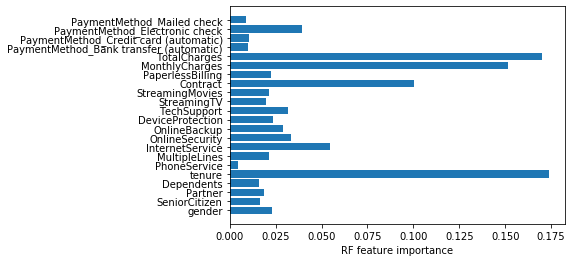

In [64]:
col_name = X.columns
plt.barh(col_name,val)
plt.xlabel('RF feature importance')
plt.show()

This graph clearly indicates that the most important variables are

1. tenure

2. TotalCharges

3. MonthlyCharges

4. Contract


Using only the most important variables

In [65]:
y = df['Churn']
X_new = df_final[['tenure','TotalCharges','MonthlyCharges', 'Contract']]

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y, test_size =0.2, shuffle = True)

In [67]:
lr = LogisticRegression().fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [68]:
lr_precision = precision_score(y_test,lr_pred)
lr_recall = recall_score(y_test,lr_pred)
lr_f1 = f1_score(y_test,lr_pred)

In [69]:
print('LR Precision',lr_precision)
print('LR recall', lr_recall)
print('LR F1 score',lr_f1)

LR Precision 0.6036363636363636
LR recall 0.44623655913978494
LR F1 score 0.5131375579598145
